# Data preprocessing using Microsoft's Megadetector model

This code can be used to run in your command line or terminal, this code was ran on a Windows 10 machine, using the base Command Prompt. Some changes may need to be made if you are using a MacOX system, then you might need to make some edits to this code.

## What is the Megadetector?

A model trained in TensorFlow on NC12v3 DSVM, Faster R-CNN (an object detection algorithm) with an InceptionResnetV2 (a neural network) base and base pre-trained on the Microsoft COCO dataset (a publicly available dataset containing images of various objects).



## Downloading the Megadetector
* Full instructions can be found [here](https://github.com/microsoft/CameraTraps/blob/master/megadetector.md) to download the latest version MegaDetector v4.1
* The below code is what you can run in your command line if you want to run the detector on your images to see what it can crop
* The cd command will change your directory (like setting your working directory in the R language)
* Note that the command set is equivalent to the 'export' command when usin Liux
* The F:/ is the driver name for the hard drive that the code was stored on, this can be wherever you downloaded and the Megadector repository to
* c:\ would be your home or default drive

In [ ]:
mkdir f:\git
cd f:\git
git clone https://github.com/Microsoft/cameratraps
git clone https://github.com/Microsoft/ai4eutils
pip install pillow humanfriendly matplotlib tqdm jsonpickle statistics requests
set PYTHONPATH=f:\git\cameratraps;f:\git\ai4eutils

In [ ]:
pip install tensorflow==1.13.1
pip install pillow humanfriendly matplotlib tqdm jsonpickle statistics requests


If you are installing and then using separately, you may have to double check the path to the installation. For example, I cloned the Github repository to a hardrive, named F:/, so when I enter my Command Prompt it looks like this 
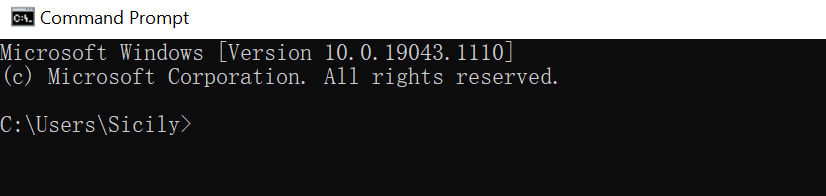

and I need to navigate to my hard-drive F:, first, before changing directory

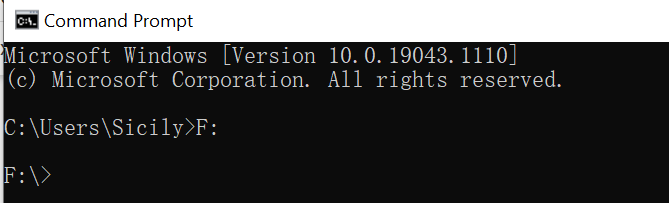



In [ ]:
cd f:\git\cameratraps\api\batch_processing\postprocessing
set PYTHONPATH=f:\git\cameratraps;f:\git\ai4eutils

Due to the fact that this code was run on a local machine, the Megadetector is relatively slow to run. This can be sped up by performing batch processing using the Azure batch processing API that runs images on many GPUs at once on Azure.
You can test it the MegaDetector on one image, or a folder of images, and produce cropped .jpg files


In [ ]:
#run on just one image, this  line of code is taken from the MegaDetector github repository
python where_you_downloaded_the_script/run_tf_detector.py where_you_downloaded_the_detector_file/md_v4.1.0.pb --image_file some_image_file.jpg

#run on a folder of images, note you can run the Megadetector from a hardrive, as long as you change your directory in the Microsoft
python F:/git/camberatraps/detection/run_tf_detector.py F:/git/md_v4.1.0.pb --image_dir F:/git/van_hasselt --crop

## Post detection steps

The line of code where you can run the Megadetector on a folder of images will generate extra images per photo in the same input folder. If you have a photo of many birds in a cage, the Megadetector may crop multiple photos from the same image, these will have the same name as the original file (i.e. 'blue winged SRG (1)'), and will be labelled sequentially, i.e. ('blue winged srg (1)_crop00_detections'). To create folders of cropped images for each species, we manually reviewed each species folder after running the Megadetector, and deleted incorrect crops (i.e. in some cases a banana in a bird cage was cropped, as the model thought it was an animal). In cases where the crop was correct, we deleted the original ground truth image, where the bird may not be the focus of the photo.Anything incorrectly or not cropped was cropped by hand in the Photos app in Windows 10.

##Other options to running locally
If you are not as comfortable to download the Megadetector locally, you can find a GUI implementation here: https://github.com/petargyurov/megadetector-gui.